In [1]:
import os

In [2]:
os.chdir(r"E:\NUS\SPMF 5005\Practice Module")

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df= pd.read_excel("Mobile Phone Survey for Clustering Updated Version.xlsx")

In [5]:
df.head(3)

,Gender Group,Age Bracket,"Bracket of Satisfaction Level, 3 or less is 0",Mode of Purchase,A1,A2,A3,B1,B2,B3,...,M3,N1,N2,N3,O1,O2,O3,P1,P2,P3
0,1,2,1,0,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
1,1,2,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,2,2,0,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0


In [6]:
X=df.drop(["Gender Group","Bracket of Satisfaction Level, 3 or less is 0","Mode of Purchase"], axis=1)

In [7]:
X.head(3)

,Age Bracket,A1,A2,A3,B1,B2,B3,C1,C2,C3,...,M3,N1,N2,N3,O1,O2,O3,P1,P2,P3
0,2,0,1,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
1,2,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,2,0,1,0,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0


In [8]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,max_iter=500).fit(X)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

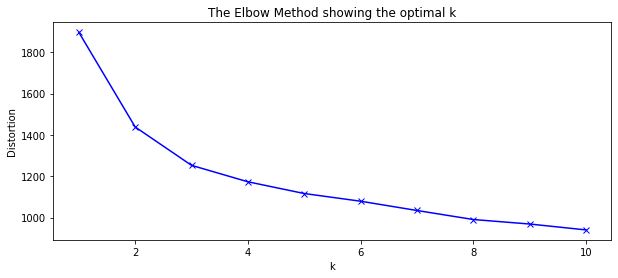

In [9]:
plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
km1 = KMeans(n_clusters=3, init='k-means++', max_iter=500)
km1.fit(X)

KMeans(max_iter=500, n_clusters=3)

In [11]:
print("Coefficient for 3 clusters: %0.3f"
      % metrics.silhouette_score(X, km1.labels_))

Coefficient for 3 clusters: 0.206


In [12]:
#Calinski-Harabasz Index
y=np.array(X)
metrics.calinski_harabasz_score(y, km1.labels_)

46.791852182631295

In [13]:
from sklearn.metrics import davies_bouldin_score

y=np.array(X)
davies_bouldin_score(y, km1.labels_)

2.059671635654303